In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as regg

In [2]:
#load data, index col to set first col as index
df = pd.read_csv("Regression.csv", index_col = 0)  

In [3]:
#dimension of data
df.shape

(28155, 7)

In [4]:
#initial rows
df.head(10)

,wage,education,experience,ethnicity,smsa,region,parttime
Sr No.,,,,,,,
1,354.94,7,45,cauc,yes,northeast,no
2,123.46,12,1,cauc,yes,northeast,yes
3,370.37,9,9,cauc,yes,northeast,no
4,754.94,11,46,cauc,yes,northeast,no
5,593.54,12,36,cauc,yes,northeast,no
6,377.23,16,22,cauc,yes,northeast,no
7,284.90,8,51,cauc,yes,northeast,no
8,561.13,12,34,cauc,yes,northeast,no
9,264.06,12,0,cauc,yes,northeast,no


In [6]:
#descriptive stats for countinuous variable
df.describe()

# No missing values in cont. variables
# negative value in experience

,wage,education,experience
count,28155.000000,28155.000000,28155.000000
mean,603.726846,13.067874,18.199929
std,453.547350,2.899682,13.079233
min,50.050000,0.000000,-4.000000
25%,308.640000,12.000000,8.000000
50%,522.320000,12.000000,16.000000
75%,783.480000,15.000000,27.000000
max,18777.200000,18.000000,63.000000


In [7]:
#removing negative value from experience
df["experience"] = abs(df["experience"])
df.describe()

,wage,education,experience
count,28155.000000,28155.000000,28155.000000
mean,603.726846,13.067874,18.233387
std,453.547350,2.899682,13.032548
min,50.050000,0.000000,0.000000
25%,308.640000,12.000000,8.000000
50%,522.320000,12.000000,16.000000
75%,783.480000,15.000000,27.000000
max,18777.200000,18.000000,63.000000


In [8]:
#missing values
df.isnull().sum()

wage          0
education     0
experience    0
ethnicity     0
smsa          0
region        0
parttime      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1da37d5f970>,
 'caps': [<matplotlib.lines.Line2D at 0x1da37d6b0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da37d5f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da37d6b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da37d6bb80>],
 'means': []}

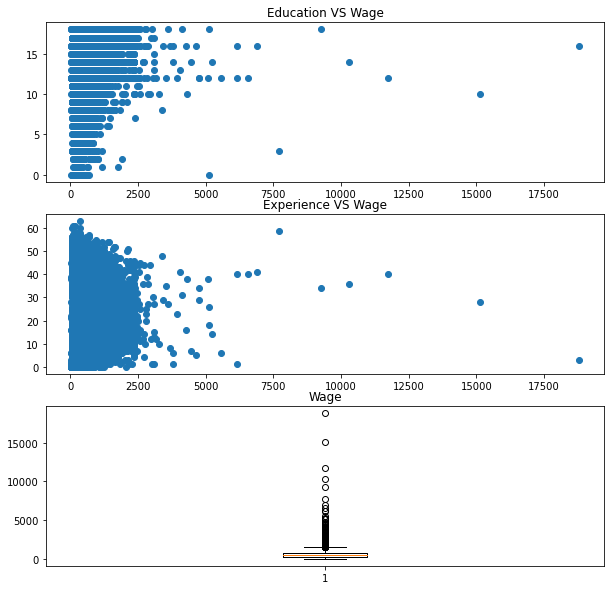

In [24]:
#scatter plot for checking linearity
#plt.subplot(nrows, ncols, index)
plt.figure(figsize = (10,10))

plt.subplot(311)
plt.title("Education VS Wage")
plt.scatter( df.wage, df.education)

plt.subplot(312)
plt.title("Experience VS Wage")
plt.scatter(df.wage, df.experience)

plt.subplot(313)
plt.title("Wage")
plt.boxplot(df.wage)

#data is not linear

{'whiskers': [<matplotlib.lines.Line2D at 0x1da37eaa100>,
 'caps': [<matplotlib.lines.Line2D at 0x1da37eaa700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da37e9ad30>],
 'medians': [<matplotlib.lines.Line2D at 0x1da37eaae20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da37eb51f0>],
 'means': []}

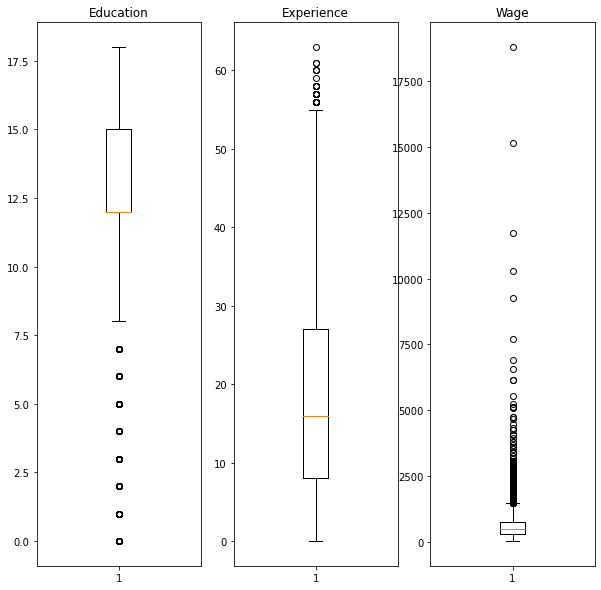

In [25]:
#box plot for outliers
plt.figure(figsize = (10,10))

plt.subplot(131)
plt.title("Education")
plt.boxplot(df["education"])

plt.subplot(132)
plt.title("Experience")
plt.boxplot(df["experience"])

plt.subplot(133)
plt.title("Wage")
plt.boxplot(df.wage)

In [28]:
# outlier removal using IQR
Q1 = df.education.quantile(0.25)
Q3 = df.education.quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + (1.5 * IQR)
LB = Q1 - (1.5 * IQR)
#df[(df.education > UB) | (df.education < LB)].shape
df = df[(df.education <= UB) & (df.education >= LB)]


Q1 = df.experience.quantile(0.25)
Q3 = df.experience.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)
# df[(df.experience < LB) | (df.experience > UB)].shape
df = df[(df.experience >= LB) & (df.experience <= UB)]



Q1 = df.wage.quantile(0.25)
Q3 = df.wage.quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

# df[(df.wage < LB) | (df.wage > UB)].shape
df = df[(df.wage >= LB) & (df.wage <= UB)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1da3842a910>,
 'caps': [<matplotlib.lines.Line2D at 0x1da38449670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da38439ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da38449d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da38455160>],
 'means': []}

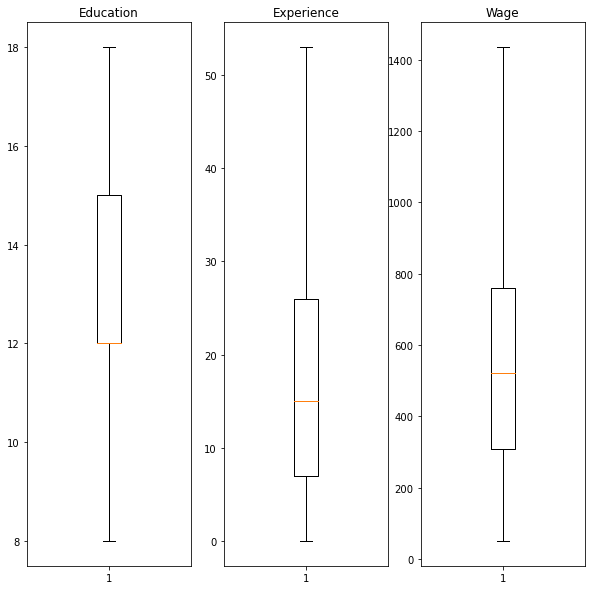

In [29]:
#box plot for outliers
plt.figure(figsize = (10,10))

plt.subplot(131)
plt.title("Education")
plt.boxplot(df["education"])

plt.subplot(132)
plt.title("Experience")
plt.boxplot(df["experience"])

plt.subplot(133)
plt.title("Wage")
plt.boxplot(df.wage)

In [30]:
df.describe()

,wage,education,experience
count,26130.000000,26130.000000,26130.000000
mean,557.995633,13.286338,17.449445
std,310.707203,2.390145,12.683284
min,50.050000,8.000000,0.000000
25%,308.640000,12.000000,7.000000
50%,522.320000,12.000000,15.000000
75%,759.730000,15.000000,26.000000
max,1435.540000,18.000000,53.000000


<AxesSubplot:>

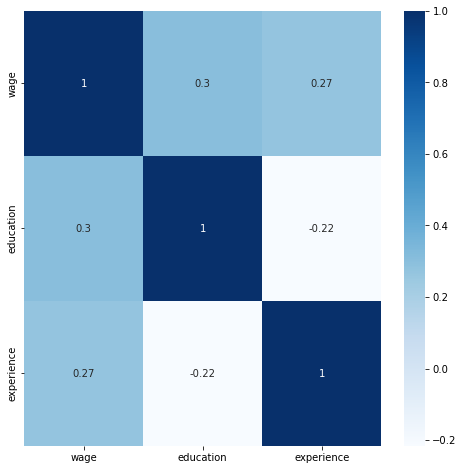

In [31]:
#checking correlation
#between independent and dependent > 0.6
#between independent < 0.1

correlation = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, annot = True, alpha = 1, cmap = "Blues")

In [32]:
#dummy varibales for categorical variables
df = pd.get_dummies(df)
df.head(10)

,wage,education,experience,ethnicity_afam,ethnicity_cauc,smsa_no,smsa_yes,region_midwest,region_northeast,region_south,region_west,parttime_no,parttime_yes
Sr No.,,,,,,,,,,,,,
2,123.46,12,1,0,1,0,1,0,1,0,0,0,1
3,370.37,9,9,0,1,0,1,0,1,0,0,1,0
4,754.94,11,46,0,1,0,1,0,1,0,0,1,0
5,593.54,12,36,0,1,0,1,0,1,0,0,1,0
6,377.23,16,22,0,1,0,1,0,1,0,0,1,0
7,284.90,8,51,0,1,0,1,0,1,0,0,1,0
8,561.13,12,34,0,1,0,1,0,1,0,0,1,0
9,264.06,12,0,0,1,0,1,0,1,0,0,1,0
11,474.83,12,17,0,1,0,1,0,1,0,0,1,0


In [41]:
#testing normality of data
df1 = df[["education", "experience"]]
stats.shapiro(df1)
# H0: Population is normally distributed 
# H1: Population is not normally distributed  
# p-value = 0.0
# a-value = 0.05
# as p < a
# We accept null hypothesis that sample data comes from normally distributed population.

ShapiroResult(statistic=0.8627742528915405, pvalue=0.0)

In [42]:
stats.shapiro(df.wage)

ShapiroResult(statistic=0.9647114872932434, pvalue=0.0)

(array([1211., 1598., 2068., 2120., 2198., 2080., 2379., 2056., 1740.,
        1857., 1314., 1337., 1222.,  578.,  638.,  426.,  515.,  279.,
         240.,  274.]),
 array([  50.05  ,  119.3245,  188.599 ,  257.8735,  327.148 ,  396.4225,
         465.697 ,  534.9715,  604.246 ,  673.5205,  742.795 ,  812.0695,
         881.344 ,  950.6185, 1019.893 , 1089.1675, 1158.442 , 1227.7165,
        1296.991 , 1366.2655, 1435.54  ]),
 <BarContainer object of 20 artists>)

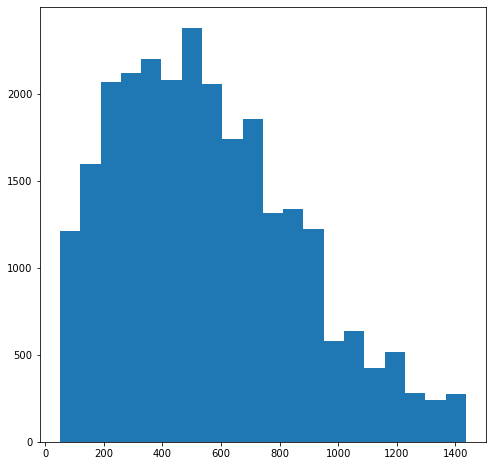

In [43]:
#histogram to identify the normaality of wage, data is right skew.
# Preprocessing to remove the skewness
plt.figure(figsize=(8,8))
plt.hist(df.wage, bins = 20)

In [44]:
#spliting data and target
x = df.drop("wage", axis = 1) #data
y = df["wage"] #target

In [45]:
# The preprocessing.scale() algorithm puts sparse data on one scale following the concept of Normalization and Standardization.
# The issue with sparsity is that it very biased or in statistical terms skewed. 
# So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity. 
x = preprocessing.scale(x)

(array([[    0.,   640.,  1645.,  1077., 12439.,  2885.,  4708.,  2736.,
             0.,     0.],
        [    0.,     0.,   821.,  6722.,  7518.,  4889.,  2807.,  2368.,
           938.,    67.],
        [    0.,     0.,     0.,     0., 24037.,     0.,     0.,     0.,
             0.,  2093.],
        [ 2093.,     0.,     0.,     0.,     0., 24037.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0., 19255.,     0.,     0.,  6875.,
             0.,     0.],
        [    0.,     0.,  6875.,     0.,     0., 19255.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0., 19570.,     0.,     0.,  6560.,
             0.,     0.],
        [    0.,     0.,     0.,     0., 20140.,     0.,     0.,  5990.,
             0.,     0.],
        [    0.,     0.,     0.,     0., 18054.,     0.,     0.,  8076.,
             0.,     0.],
        [    0.,     0.,     0.,     0., 20626.,     0.,     0.,  5504.,
             0.,     0.],
        [ 

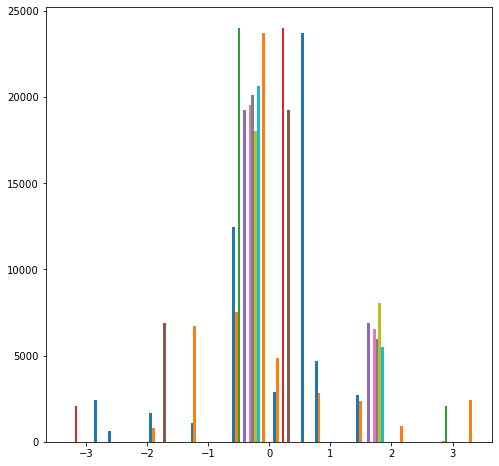

In [54]:
plt.figure(figsize=(8,8))
plt.hist(x, bins = 10)
# we can have a general idea that the data is scaled.

In [55]:
#spliting for train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [63]:
#model making
x = regg.add_constant(x) #adding constant
model = regg.OLS(y,x).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1476.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:09:24   Log-Likelihood:            -1.8166e+05
No. Observations:               26130   AIC:                         3.633e+05
Df Residuals:                   26120   BIC:                         3.634e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        557.7098      2.206    252.811      0.000     553.386     562.034
x1           110.4789      1.618     68.262      0.000     107.307     113.651
x2            98.7934      1.620     60.980      0.000      95.618     101.969
x3         -5.832e+10   3.17e+11     -0.184      0.854    -6.8e+11    5.63e+11
x4         -5.832e+10   3.17e+11     -0.184      0.854    -6.8e+11    5.63e+11
x5          4.891e+11   2.66e+12      0.184      0.854   -4.73e+12     5.7e+12
x6          4.891e+11   2.66e+12      0.184      0.854   -4.73e+12     5.7e+12
x7          2.888e+13   1.57e+14      0.184      0.854   -2.79e+14    3.37e+14
x8            2.8e+13   1.52e+14      0.184      0.854   -2.71e+14    3.27e+14
x9          3.078e+13   1.67e+14      0.184      0.854   -2.97e+14    3.59e+14
x10         2.716e+13   1.48e+14      0.184      0.854   -2.62e+14    3.17e+14
x11        -1.566e+10   8.52e+10     -0.184      0.854   -1.83e+11    1.51e+11
x12        -1.566e+10   8.52e+10     -0.184      0.854   -1.83e+11    1.51e+11
==============================================================================
Omnibus:                      854.137   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.865
Skew:                           0.436   Prob(JB):                    2.73e-208
Kurtosis:                       3.344   Cond. No.                     1.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""